In [1]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing

In [3]:
from tensorflow import keras
from keras.utils import np_utils
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
# Importing and cleaning the data
train_data = pd.read_csv('DBS.csv', sep=';')
test_data = pd.read_csv('DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year,Unnamed: 12
0,619,38.84,E,20,70.15,C,14.86,190.0,A,1,2016,2016/2017,NaN
1,738,43.33,D,19,81.09,A,12.36,190.0,A,1,2016,2016/2017,NaN
2,2392,38.44,E,16,77.70,A,14.59,190.0,A,1,2016,2016/2017,NaN
3,595,49.07,C,20,82.55,A,15.31,190.0,A,1,2016,2016/2017,NaN
4,424,37.40,E,20,66.54,C,11.80,190.0,A,1,2016,2016/2017,NaN


In [5]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

In [6]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

In [7]:
data = train_data[['access','tests','assignments','graduate']]
data.head()

,access,tests,assignments,graduate
0,619,38.84,14.86,1
1,738,43.33,12.36,1
2,2392,38.44,14.59,1
3,595,49.07,15.31,1
4,424,37.40,11.80,1


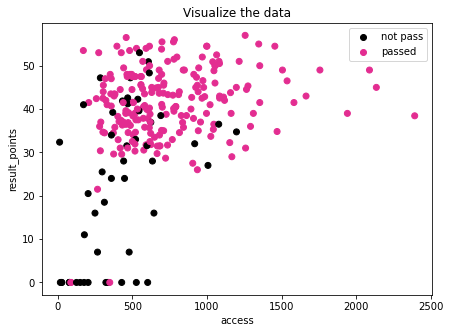

In [8]:
# Visualization of data
X_train = data.iloc[:,:3].values
y_train = data.iloc[:,3].values

y_train = np.where(y_train== 0.0,-1,1)
    
cm_bright = ListedColormap(['#000000', '#E32D91'])
plt.figure(figsize=(7,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright)
plt.scatter(None, None, color = '#000000', label='not pass')
plt.scatter(None, None, color = '#E32D91', label='passed')
plt.legend()

plt.title('Visualize the data')
plt.xlabel('access')
plt.ylabel('result_points')
plt.show()

In [9]:
X_train = data.iloc[:,:3]
y_train = data.iloc[:,3]

standardized_X_train = preprocessing.scale(X_train)
print(standardized_X_train)

[[-1.51041814e-01  8.82982099e-02 -2.84978533e-01]
 [ 1.65409896e-01  4.22161061e-01 -5.15178280e-01]
 [ 4.56382274e+00  5.85554169e-02 -3.09840106e-01]
 [-2.14864008e-01  8.48970140e-01 -2.43542579e-01]
 [-6.69597137e-01 -1.87758449e-02 -5.66743023e-01]
 [ 9.87120640e-01  8.31868034e-01 -3.27335286e-01]
 [ 6.75987446e-01  7.19588991e-01 -3.18127297e-01]
 [ 1.59343148e+00  5.70875026e-01 -5.96208590e-01]
 [ 7.90335543e-01  6.62334114e-01 -3.52196859e-01]
 [ 5.37210575e-02  1.20216581e+00 -2.33413790e-01]
 [ 1.15731316e+00  3.79777581e-01 -5.69505420e-01]
 [ 1.11729284e-02  4.45211726e-01 -4.40593562e-01]
 [ 9.65846575e-01  9.85786988e-01 -4.73742325e-01]
 [-5.33974976e-01  1.12092444e-01 -4.27702376e-01]
 [-5.02063879e-01 -1.06517084e-01 -4.14811190e-01]
 [ 5.35896113e-04  7.00256175e-01 -5.15178280e-01]
 [-3.13256556e-01  5.93925691e-01 -5.02287094e-01]
 [-4.46714911e-02  5.36670814e-01 -4.35068768e-01]
 [ 2.55824671e-01  4.12494653e-01 -7.38011634e-01]
 [ 3.56876477e-01  4.22161061e-

In [10]:
standardized_X_test = preprocessing.scale(X_test)
print(standardized_X_test)

[[-0.42842609  1.61862978  1.11647127]
 [-0.26556772  0.89684455  0.62963787]
 [-0.87140086  1.37216653  1.11647127]
 [ 0.87118372  0.83205993  1.01910459]
 [ 1.54541738  1.1433078   0.82437123]
 [ 1.3337015   0.90388636  1.11647127]
 [ 0.69529668  1.00951347  1.11647127]
 [-0.94957288  0.94120794  0.24017115]
 [-0.91374404  0.74403734  0.43490451]
 [ 1.17410029  1.10105696  0.92173791]
 [-0.64339914  0.91304071 -0.14929558]
 [ 0.06340619  0.61517227  0.24017115]
 [ 0.24906474  0.81938467  0.92173791]
 [-1.06357374  0.53278312  0.24017115]
 [-0.48379794  0.11520396  0.82437123]
 [ 1.28158682  0.41800167  1.01910459]
 [-0.38608291  1.08345244 -0.34402894]
 [-0.06362334 -1.74031221 -2.48609591]
 [-0.89094387  1.12922419  0.72700455]
 [-0.50008378  0.33349998  1.01910459]
 [-0.1678527   0.31237456  0.82437123]
 [-0.70202816  0.59052594  0.24017115]
 [ 1.06661377  0.5447542   1.31120463]
 [ 0.02106302  0.81938467  0.92173791]
 [ 1.42490219 -1.67904848 -2.48609591]
 [ 2.61702547 -0.01154856

In [11]:
# Transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(standardized_X_train, y_train)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [13]:
# Define the Keras model
classifier = Sequential()


classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal', input_dim=3))

classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))

classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [14]:
# Compile the Keras model
classifier.compile(optimizer ='adam', loss='mean_squared_error', metrics =['accuracy'])

In [15]:
# Fit the Keras model on the dataset
history = classifier.fit(X_train, y_train, batch_size=5, epochs=100, validation_data=(standardized_X_test,y_test))

Epoch 1/100
85/85 [==============================] - 1s 12ms/step - loss: 0.2494 - accuracy: 0.5806 - val_loss: 0.2455 - val_accuracy: 0.7833
Epoch 2/100
85/85 [==============================] - 0s 855us/step - loss: 0.2370 - accuracy: 0.7530 - val_loss: 0.2093 - val_accuracy: 0.8167
Epoch 3/100
85/85 [==============================] - 0s 855us/step - loss: 0.2014 - accuracy: 0.6765 - val_loss: 0.1585 - val_accuracy: 0.8333
Epoch 4/100
85/85 [==============================] - 0s 831us/step - loss: 0.1676 - accuracy: 0.7290 - val_loss: 0.1364 - val_accuracy: 0.8333
Epoch 5/100
85/85 [==============================] - 0s 843us/step - loss: 0.1725 - accuracy: 0.6778 - val_loss: 0.1306 - val_accuracy: 0.8167
Epoch 6/100
85/85 [==============================] - 0s 879us/step - loss: 0.1676 - accuracy: 0.6750 - val_loss: 0.1281 - val_accuracy: 0.8167
Epoch 7/100
85/85 [==============================] - 0s 843us/step - loss: 0.1650 - accuracy: 0.6897 - val_loss: 0.1264 - val_accuracy: 0.8167


In [16]:
# Evaluate the Keras model
eval_model=classifier.evaluate(X_test, y_test)
eval_model

2/2 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.7667


[0.23333333432674408, 0.7666666507720947]

In [17]:
# Predictions
y_pred=classifier.predict(standardized_X_test)
y_pred =(y_pred>0.5)

In [18]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  2]
 [ 5 41]]


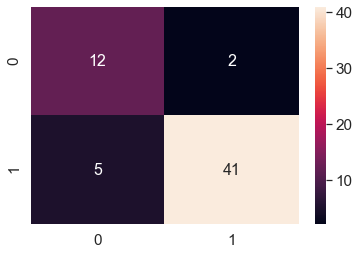

In [23]:
# Confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[12,2],
        [5,41]]  

df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [20]:
# Accuracy
print("\nAccuracy: %.2f%%" % (eval_model[1]*100))


Accuracy: 76.67%


In [21]:
# Classificaton report
from sklearn.metrics import classification_report # evaluation metric
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.95      0.89      0.92        46

    accuracy                           0.88        60
   macro avg       0.83      0.87      0.85        60
weighted avg       0.90      0.88      0.89        60

